In [63]:
import random

x = [random.randint(1,200) for i in range(100)] + [random.randint(1,200) for i in range(100)]
y = [random.randint(1,200) for i in range(100)] + [random.randint(1,1000) for i in range(100)]

initial_c = 0
initial_m = 0

num_iteration = 1000
print(x,y)

[90, 112, 99, 136, 112, 129, 93, 174, 104, 151, 140, 120, 109, 182, 133, 155, 135, 37, 27, 172, 153, 124, 175, 122, 170, 70, 145, 19, 46, 79, 174, 20, 43, 155, 163, 170, 9, 175, 65, 147, 29, 163, 16, 41, 53, 183, 182, 28, 52, 190, 50, 168, 138, 61, 2, 157, 1, 61, 60, 78, 144, 112, 192, 152, 55, 118, 144, 106, 63, 38, 13, 32, 10, 168, 74, 194, 148, 170, 87, 135, 139, 141, 134, 103, 22, 154, 111, 127, 149, 107, 150, 136, 36, 19, 9, 102, 48, 15, 184, 140, 80, 78, 7, 62, 14, 194, 195, 148, 76, 37, 123, 157, 122, 71, 164, 2, 142, 110, 42, 150, 198, 176, 83, 44, 117, 99, 60, 178, 132, 35, 76, 98, 190, 87, 65, 67, 73, 185, 200, 83, 68, 28, 43, 159, 181, 93, 183, 103, 166, 64, 3, 174, 132, 151, 153, 154, 80, 57, 118, 22, 55, 183, 112, 43, 46, 4, 101, 23, 23, 169, 135, 187, 29, 55, 126, 119, 121, 156, 178, 153, 191, 117, 56, 93, 114, 187, 20, 95, 39, 87, 52, 56, 83, 155, 62, 155, 29, 42, 180, 18] [14, 104, 59, 37, 197, 154, 72, 15, 197, 76, 92, 140, 116, 116, 14, 43, 54, 11, 132, 194, 164, 93, 

In [3]:
def predict(m,x,c):
    return m*x + c

In [11]:
def computer_error(m,c,x_list,y_list):
    sum_squared_error = 0
    for x,y in zip(x_list,y_list):
        prediction = m*x + c
        sum_squared_error += (y - prediction)**2
    return sum_squared_error/len(x_list)

In [5]:
computer_error(1,0,x,y)

11

Error Function: 
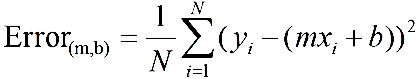

Partial Derivative:
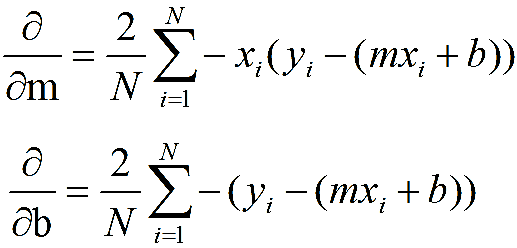


In [6]:
def step_gradient(m_current, c_current, x_list, y_list,learning_rate = 0.0001):
    c_gradient = 0
    m_gradient = 0
    
    N = float(len(x_list))
    
    for x, y in zip(x_list,y_list):
        prediction = y - m_current*x + c_current
        c_gradient += -(2/N)*prediction
        m_gradient += -(2/N)*x*prediction
    new_c = c_current - learning_rate*c_gradient 
    new_m = m_current - learning_rate*m_gradient
    return [new_m, new_c]
        

In [ ]:
# Did not understant step gradient well... need some calculus study

Learning Rate 0.1 m = 0 c =  0 error= 174385.5
Learning Rate 0.01 m = 0 c =  0 error= 174385.5
Learning Rate 0.001 m = 0 c =  0 error= 174385.5
Learning Rate 0.0001 m = 0 c =  0 error= 174385.5
Learning Rate 1e-05 m = 0 c =  0 error= 174385.5
m = 2.1597275380000847 c =  0.15659208298423113 error= 109211.11686905155


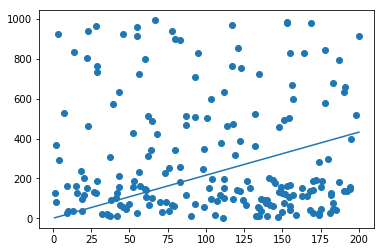

In [64]:
m = initial_m
c = initial_c
num_iteration = 100
error = computer_error(m,c, x,y)
learning_rate = 1
for i in range(num_iteration):
    m_j, c_j = step_gradient(m,c, x,y, learning_rate)
    error_j = computer_error(m_j,c_j, x,y)
    if error_j > error:
        if learning_rate>0.00000000001:
            learning_rate/=10
            print('Learning Rate', learning_rate,'m =',m,'c = ',c,'error=', computer_error(m,c, x,y))

            continue
        break
    error = error_j
    m = m_j
    c = c_j
    
print('m =',m,'c = ',c,'error=', computer_error(m,c, x,y))

%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)

X = [i for i in range(min(x),max(x)+1)]
Y = [predict(m,i,c) for i in X]
plt.plot(X,Y)


In [32]:
x.sort()
print(x)


[1, 2, 3, 4]
